# Data Science Principles and Practices (COMM054) Lab Week 4

Follow this handout and attemp the tasks. This set of exercises focusses on writing basic Python code to perform calculations for probability theory and statistics with the SciPy library. Do not worry if you do not complete them all in the timetabled lab session.

This is not assessed but will help you gain practical experience for the module exam and coursework.

You will need to download some of the csv data set files from the module SurreyLearn page and place them in the same folder as this notebook.

## SciPy

SciPy stands for **Scientific Python**. It is a scientific computation library that uses NumPy underneath. However, SciPy has optimised and added functions that are frequently used in NumPy and Data Science. In particular, it provides more utility functions for optimisation, stats and signal processing.


SciPy is a collection of packages addressing a number of different standard problem domains in scientific computing. For instance, 

* scipy.integrate: numerical integration routines and differential equation solvers
* scipy.linalg: linear algebra routines and matrix decompositions extending beyond those provided in numpy.linalg.
* scipy.optimize: function optimizers (minimizers) and root finding algorithms
* scipy.signal: signal processing tools
* scipy.sparse: sparse matrices and sparse linear system solvers
* scipy.special: wrapper around SPECFUN, a Fortran library implementing many common mathematical functions, such as the gamma function
* scipy.stats: standard continuous and discrete probability distributions (density functions, samplers, continuous distribution functions), various statistical tests, and more descriptive statistics
* scipy.weave: tool for using inline C++ code to accelerate array computations

Documentation of SciPy can be found here: https://docs.scipy.org/doc/scipy/reference/

We will mostly use `scipy.stats` for this week. https://docs.scipy.org/doc/scipy/reference/tutorial/stats.html

Once SciPy is installed, import the SciPy module(s) you want to use in your applications by adding the `from scipy import module` statement. For instance,

`from scipy import constants`

Now we have imported the constants module from SciPy, and the application is ready to use it:

Example: How many cubic meters are in one liter:

`from scipy import constants`

`print(constants.liter)`

Test it yourself below.

In [1]:
from scipy import constants
print(constants.liter)

0.001


## Descriptive Statistics

In the code samples below, we assume that the `scipy.stats` package is imported as `ss`

```python
import scipy.stats as ss
```

You can also import individual *objects* from `scipy.stats` if you would prefer to drop the `ss` prefix

```python
from scipy.stats import norm 
```

The `norm` module is related the normal distribution.

Import `stats.stats` as `ss` below. 

In [2]:
import scipy.stats as ss

### Mean, Median, Mode


Let's look at the following three measures

* Mean - The average value
* Median - The mid point value
* Mode - The most common value

Example: We have registered the speed of 13 cars:

`speed = [99,86,87,88,111,86,103,87,94,78,77,85,86]`

You can use the NumPy `mean()` method to find the average speed.

`np.mean(speed)`

Try it below. (Do not forget to import NumPy!)

In [3]:
import numpy as np

speed = [99,86,87,88,111,86,103,87,94,78,77,85,86]
np.mean(speed)

89.76923076923077

Use the NumPy `median()` method to find the median of speed.

Try it below.

In [4]:
np.median(speed)

87.0

The SciPy's stats module has a method `mode()` to compute the mode (it actually returns the `mode` and the `count`, i.e. the number of times the mode appears in the dataset). 

Try to compute the **mode** of the speed.

In [5]:
ss.mode(speed)

ModeResult(mode=array([86]), count=array([3]))

### Variance and Standard Deviation

The NumPy module has a method `var()` to calculate the variance, and a method `std()` to calculate the standard deviation.  

Try to compute the variance and standard deviation for the list *speed* given above (use print to display your answers).

In [6]:
x = np.var(speed)
y = np.std(speed)

print("The variance is ", x)
print("The standard deviation is ", y)

The variance is  85.71597633136093
The standard deviation is  9.258292301032677


As mentioned in the lecture, there are two different definitions of sample variance: *biased* and *unbiased*. 

`np.var()` method actually returns the **biased** sample variance. 

To compute the unbiased sample variance, you can set `ddof` which is an optional argument of `var` and `std`.
ddof stands for “Delta Degrees of Freedom”: the divisor used in the calculation is N - ddof, where N represents the number of elements. By default ddof is zero.

```python
x = np.var(speed, ddof=1)
y = np.std(speed, ddof=1)
```

Try them below and compare with the results you had before. 

In [7]:
x = np.var(speed, ddof=1)
y = np.std(speed, ddof=1)

print("The unbiased variance is ", x)
print("The unbiased standard deviation is", y)

The unbiased variance is  92.85897435897435
The unbiased standard deviation is 9.636336148089395


### Python statistics Module

Python has a **built-in** module **statistics** that you can use to calculate some descriptive statistics of numeric data.
The statistics module was new in Python 3.4.

* `statistics.mean()`	Calculates the mean (average) of the given data
* `statistics.median()`	Calculates the median (middle value) of the given data
* `statistics.median_grouped()`	Calculates the median of grouped continuous data* 
* `statistics.median_high()` Calculates the high median of the given data
* `statistics.median_low()`	Calculates the low median of the given data
* `statistics.mode()`	Calculates the mode (central tendency) of the given numeric or nominal data
* `statistics.pstdev()`	Calculates the standard deviation from an entire population
* `statistics.stdev()`	Calculates the standard deviation from a sample of data
* `statistics.pvariance()`	Calculates the variance of an entire population
* `statistics.variance()`	Calculates the variance from a sample of data

For instance, to compute the unbiased variance, you could use `statistics.variance()` which gets closer to the population variance than `statistics.pvariance()`

### Task 1.1

Use these functions to compute the mean, median, (biased and unbiased) variance and standard deviation for speed. Compare the result with the one using NumPy. Don't forget to `import statistics` first.

In [8]:
import statistics

print(np.var(speed,ddof=1))
print(statistics.variance(speed))

print(np.var(speed,ddof=0))
print(statistics.pvariance(speed))

92.85897435897435
92.85897435897436
85.71597633136093
85.71597633136095


### Task 1.2

Recall the diamonds dataset which you have used in the first lab. For the price of the diamonds whose carat is greater than 2. Find

* mean
* median
* unbiased variance
* biased variance
* unbiased standard deviation
* biased standard deviation

In [9]:
import pandas as pd

diamonds = pd.read_csv("diamonds.csv")

x = diamonds.loc[diamonds.carat>2, 'price']

print("The mean price is ", np.mean(x))
print("The median price is ", np.median(x))
print("The unbiased variance of price is ", np.var(x, ddof=1))
print("The variance of price is ", np.var(x, ddof=0))

print("The unbiased standard deviation of price is ", np.std(x, ddof=1))
print("The standard deviation of price is ", np.std(x, ddof=0))

The mean price is  14951.250397035468
The median price is  15392.0
The unbiased variance of price is  7309423.37317914
The variance of price is  7305553.906067875
The unbiased standard deviation of price is  2703.594528249223
The standard deviation of price is  2702.878818235822


### Percentiles
Percentiles are used in statistics to give you a number that describes the value that a given percent of the values are lower than.

**Example**: Let's say we have an array of the ages of all the people that lives in a street.

```python
ages = [5,31,43,48,50,41,7,11,15,39,80,82,32,2,8,6,25,36,27,61,31]
x = np.percentile(ages, 75)
print(x)
```

Try this yourself.

In [10]:
ages = [5,31,43,48,50,41,7,11,15,39,80,82,32,2,8,6,25,36,27,61,31]
x = np.percentile(ages, 75)
print(x)

43.0


What is the age that 90% of the people are younger than?

In [11]:
ages = [5,31,43,48,50,41,7,11,15,39,80,82,32,2,8,6,25,36,27,61,31]
x = np.percentile(ages, 90)
print(x)

61.0


### Task 1.3

Use percentiles to find the

* median, 
* lower quartile
* upper quartile
* interquartile range

of the list `ages = [5,31,43,48,50,41,7,11,15,39,80,82,32,2,8,6,25,36,27,61,31]`

In [12]:
ages = [5,31,43,48,50,41,7,11,15,39,80,82,32,2,8,6,25,36,27,61,31]

print("the median age is", np.median(ages))
print("the median age is", np.percentile(ages, 50))    # different way to compute the median
print("the lower quartile of age is", np.percentile(ages, 25))
print("the upper quartile of age is", np.percentile(ages, 75))
print("the interquartile range of age is", np.percentile(ages, 75)-np.percentile(ages, 25))

the median age is 31.0
the median age is 31.0
the lower quartile of age is 11.0
the upper quartile of age is 43.0
the interquartile range of age is 32.0


### Covariance and Correlation

To compute the covariance of two samples, you could use NumPy's `cov()`. 

For instance,

```
x = np.arange(10, 20)
y = np.array([2, 1, 4, 5, 8, 12, 18, 25, 96, 48])
print(np.cov(x,y))
```

Note that `np.cov(x,y)` returns a 2-by-2 matrix. The (0,0)-entry is the variance of x, 
the (1,1)-entry is the variance of y, the (0,1) or (1,0) entry is what you want, i.e., the covariance.

There is an optional argument: **bias**

`bias=True` gives a biased estimate, and `bias=False` gives an unbiased estimate. 

As with `np.var()`, you can also use `ddof=1` to achieve the same effect.

For more information, check
https://numpy.org/doc/stable/reference/generated/numpy.cov.html

Try both options below. 

In [13]:
x = np.arange(10, 20)
y = np.array([2, 1, 4, 5, 8, 12, 18, 25, 96, 48])

print(np.cov(x, y, bias=True))
print(np.cov(x, y, bias=False))
print(np.cov(x,y, ddof=1))

print(np.var(x))
print(np.var(x, ddof=1))

[[  8.25  61.35]
 [ 61.35 792.69]]
[[  9.16666667  68.16666667]
 [ 68.16666667 880.76666667]]
[[  9.16666667  68.16666667]
 [ 68.16666667 880.76666667]]
8.25
9.166666666666666


For the **correlation** of two samples, you could use NumPy's `corrcoef` (which will give a 2x2 array - the correlation coefficient will be the (0,1) or (1,0) entry).

You can also use `ss.pearsonr(x, y)` which returns a pair, and the first element is what you want.

In [14]:
x = np.arange(10, 20)
y = np.array([2, 1, 4, 5, 8, 12, 18, 25, 96, 48])
r = np.corrcoef(x,y)
print(r)

ss.pearsonr(x, y)[0]

[[1.         0.75864029]
 [0.75864029 1.        ]]


0.7586402890911869

### Task 1.4

From the large data set, the *daily mean windspeed (w knots)* and the *daily maximum gust (g knots)*
were recorded for the first 8 days in September in Hurn in 1987.

windspeed: 4, 4, 8, 7, 12, 12, 3, 10

gust: 13, 12, 19, 23, 33, 37, 10, 23

Calculate the correlation coefficient for the 8 days.

In [15]:
windspeed = [4, 4, 8, 7, 12, 12, 3, 10]
gust = [13, 12, 19, 23, 33, 37, 10, 23]

print(np.corrcoef(windspeed,gust))

[[1.         0.95329737]
 [0.95329737 1.        ]]


### Task 1.5

Again work on the diamonds dataset. Find the covariance and correlation of the carat and the price of those diamonds in the dataset whose carat is greater than 3. 

In [16]:
diamonds_big_carat = diamonds.loc[diamonds.carat>3, "carat"]
diamonds_big_price = diamonds.loc[diamonds.carat>3, "price"]

print(np.cov(diamonds_big_carat,diamonds_big_price)[0,1])
print(np.corrcoef(diamonds_big_carat,diamonds_big_price)[0,1])

342.1245161290322
0.19897757852347675


## Note

Scipy.stats module (https://docs.scipy.org/doc/scipy/reference/stats.html) contains a large number of probability distributions as well as a growing library of statistical functions.

Look under "Summary statistics" and "Frequency statistics" for many more functions for descriptive statistics. 

# Random variables

There are two general distribution classes that have been implemented for encapsulating continuous random variables and discrete random variables. Over 80 continuous random variables (RVs) and 10 discrete random variables have been implemented using these classes.  

All of the statistics functions are located in the sub-package scipy.stats and a fairly complete listing of these functions can be obtained using info(stats) in linux. The list of the random variables available can also be obtained from the docstring for the stats sub-package.


## Common methods for random variables

https://docs.scipy.org/doc/scipy/reference/stats.html

Some of the main public methods for continuous RVs are:

* rvs: Random Variates

* pdf: Probability Density Function

* cdf: Cumulative Distribution Function

* ppf: Percent Point Function (Inverse of CDF)

* stats: Return mean, variance, etc.

* moment: non-central moments of the distribution

If you haven't already done so, import `scipy.stats`
```python 
import scipy.stats as ss
```

In [17]:
import scipy.stats as ss

#### Example: normal distribution

Let’s take a **standard** normal random variable X (i.e., the distribution is N(0,1)) as an example.

You can use `ss.norm.cdf(0)` to compute the probability $P(X\leq 0)$.

In [18]:
ss.norm.cdf(0)

0.5

To compute the cdf at a number of points, we can pass a list or a numpy array.

For instance, `ss.norm.cdf(np.array([-1, 0, 1]))`

In [19]:
ss.norm.cdf([-1, 0, 1])

array([0.15865525, 0.5       , 0.84134475])

You can also use `ss.norm.mean()`, `ss.norm.std()`, `ss.norm.var()` to compute the (theoretical) expectation, standard deviation, and variance, respectively. 

In [20]:
ss.norm.mean(), ss.norm.std(), ss.norm.var()

(0.0, 1.0, 1.0)

To find the median of a distribution, we can use the percent point function `ppf()`, which is the inverse of the cdf. For instance, `ss.norm.ppf(0.95)` returns the value $\alpha$ such that $P(X\leq \alpha)=0.95$. 

Try this for other arguments such as 0.9, 0.99, etc.

In [21]:
print(ss.norm.ppf(0.95))
print(ss.norm.ppf(0.9))
print(ss.norm.ppf(0.99))

1.6448536269514722
1.2815515655446004
2.3263478740408408


To draw a sample/random variate from the normal distribution, use `ss.norm.rvs()`

In [22]:
ss.norm.rvs()

-1.4782452549720992

To generate a sequence of random variates, use the size keyword argument (e.g. `size=5`):

In [23]:
ss.norm.rvs(size=5)

array([ 0.70299771,  0.09291487, -0.6800269 , -2.18699515, -0.12247477])

All continuous distributions take `loc` and `scale` as keyword parameters to adjust the location and scale of the distribution, e.g., for the standard normal distribution, `loc` is the mean and  `scale` is the standard deviation.

You can, for instance, use this to define a general normal distribution 

`ss.norm(loc=3, scale=4)`
Compute the mean and standard deviation of this normal distribution.

In [24]:
A = ss.norm(loc=3, scale=4)
print(A.mean())
print(A.std())

3.0
4.0


**Note:** `ss.norm.rvs()` works similarly to `np.normal.random()` introduced last week. Enter the code below in the code box.

```python
import matplotlib.pyplot as plt

fig,ax = plt.subplots(nrows=1, ncols=2)

x = np.random.normal(5, 1, 100000) # mu=5, sigma=1, 100000 data points
ax[0].hist(x, 100)     # histrogram with 100 bins
ax[0].set_title("Generated using np.random.normal()")

y = ss.norm.rvs(5, 1, 100000) # mu=5, sigma=1, 100000 data points
ax[1].hist(x, 100)     # histrogram with 100 bins
ax[1].set_title("Generated using ss.norm.rvs()")

fig.tight_layout()
plt.show()
```

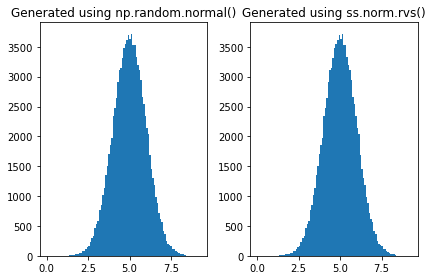

In [25]:
import matplotlib.pyplot as plt

fig,ax = plt.subplots(nrows=1, ncols=2)

x = np.random.normal(5, 1, 100000) # mu=5, sigma=1, 100000 data points
ax[0].hist(x, 100)     # histrogram with 100 bins
ax[0].set_title("Generated using np.random.normal()")

y = ss.norm.rvs(5, 1, 100000) # mu=5, sigma=1, 100000 data points
ax[1].hist(x, 100)     # histrogram with 100 bins
ax[1].set_title("Generated using ss.norm.rvs()")

fig.tight_layout()
plt.show()

However `scipy.stats` is more versatile, since for example it allows us to calculate the *theoretical* mean of a distribution (via `ss.norm.mean()`), rather than just the sample mean, as illustrated in the following code.

```python
X = ss.norm(5, 1)
print("The theoretical mean is ", X.mean())
x = X.rvs(10000)
print("The sample mean is ", np.mean(x))
```

In [26]:
X = ss.norm(5, 1)
print("The theoretical mean is ", X.mean())
x = X.rvs(100)
print("The sample mean is ", np.mean(x))

The theoretical mean is  5.0
The sample mean is  4.856585173937072


### Task 2.1

For a standard normal random variable $Z$, compute 

* $P(Z<1.23)$ 
* $P(Z\geq 1.23)$
* $P(0.4\leq Z < 1.7)$

In [27]:
print(ss.norm.cdf(1.23))
print(1-ss.norm.cdf(1.23))
print(ss.norm.cdf(1.7)-ss.norm.cdf(0.4))

0.8906514475743081
0.10934855242569186
0.3000127956311328


### Task 2.2

Given that $X\sim N(5, 5)$, compute $P(2\leq X < 9)$. 

In [28]:
import math

X = ss.norm(loc=5, scale=math.sqrt(5))
X.cdf(9) - X.cdf(2)

0.8733246175003488

#### Example: binomial distribution 

We can do quite similar things for discrete distributions. For instance, you can introduce a random variable distributed according to the binomial distribution

`X = ss.binom(10, 0.2)`

and to compute the probability that X is equal to 3, you could use

`X.pmf(3)`

In [29]:
X = ss.binom(10, 0.2) # Declare X to be a binomial random variable
X.pmf(3)                 # P(X = 3)

0.20132659200000022

### Task 2.3

For a Poisson distribution with parameter $\lambda=2$, generate a random sample of size 1000, compute the mean of the sample, and compare it with the expectation. 

In [30]:
Y = ss.poisson(2) # Declare Y to be a poisson random variable
x = Y.rvs(size=1000)        # Get a random sample from Y

print(Y.mean())
print(np.mean(x))

2.0
2.021


### Task 2.4

For a Geometric distrbution with parameter $p=0.75$, generate a random sample of size 1000, compute the (biased) variance of the sample, and compare it with the theoretical variance of the random variable. 

In [31]:
X = ss.geom(0.75) # Declare X to be a geometric random variable

x = (X.rvs(size=1000)) # Get a random sample from Y
print(np.mean(x))
print(X.mean())

1.331
1.3333333333333333
